In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
#we can drop this customer_id
df.drop("customerID", axis = "columns", inplace = True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [10]:
# we can see black spaces we drop these rows and convert it into float
df1 = df[~(df["TotalCharges"]==" ")]

In [11]:
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])

In [12]:
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

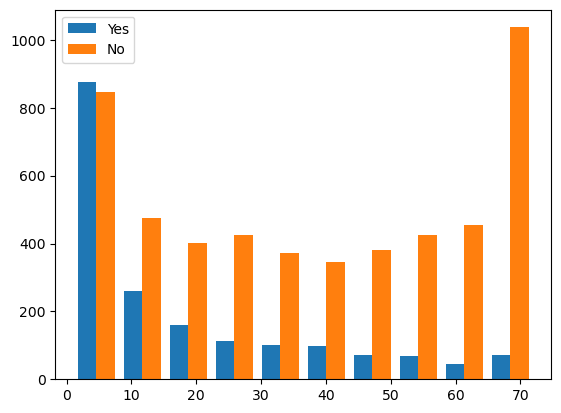

In [14]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],label = ["Yes", "No"])
plt.legend()
plt.show()

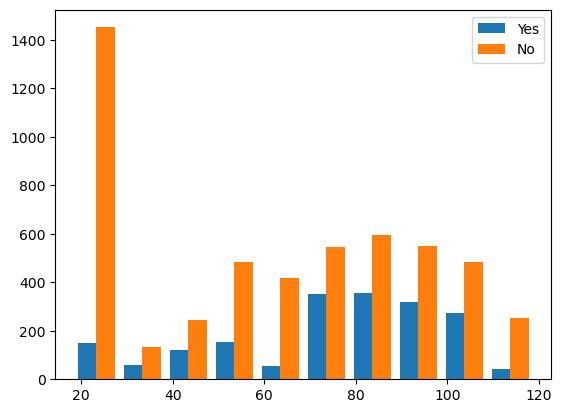

In [15]:
mc_churn_no = df1[df1["Churn"]=="No"].MonthlyCharges
mc_churn_yes = df1[df1["Churn"]=="Yes"].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no],label = ["Yes", "No"])
plt.legend()
plt.show()

In [16]:
def print_unique_colm_values(df):
    for col in df:
        if df[col].dtypes =="object":
            print(f"{col}: {df[col].unique()}\n")

In [17]:
print_unique_colm_values(df1)

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [18]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)


In [19]:
print_unique_colm_values(df1)

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['No' 'Yes']

StreamingTV: ['No' 'Yes']

StreamingMovies: ['No' 'Yes']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [20]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                 "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_columns:
    df1[col].replace({"Yes":1, "No":0}, inplace = True)

In [21]:
for col in df1:
    print(f"{col}: {df1[col].unique()}\n")

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: [1 0]

Dependents: [0 1]

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService: [0 1]

MultipleLines: [0 1]

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: [0 1]

OnlineBackup: [1 0]

DeviceProtection: [0 1]

TechSupport: [0 1]

StreamingTV: [0 1]

StreamingMovies: [0 1]

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: [1 0]

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Churn: [0 1]



In [22]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

In [23]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [24]:
df2 = pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"],dtype = int, drop_first=True)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6157,0,0,0,0,3,1,0,0,0,0,...,19.85,64.55,1,0,1,0,0,0,0,1
3552,0,0,0,0,68,1,1,1,1,1,...,102.10,7149.35,0,1,0,0,1,0,0,0
2584,1,0,1,0,58,1,0,1,1,0,...,65.25,3791.60,0,0,0,0,0,1,0,0
3906,1,0,1,0,1,1,0,0,0,0,...,78.80,78.80,1,1,0,0,0,0,1,0
6082,1,0,1,0,59,1,1,0,1,0,...,101.10,6039.90,1,1,0,0,0,0,1,0


In [26]:
df2.shape

(7032, 24)

In [27]:
df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year                          int32
Contract_Two year   

In [28]:
colums_to_scale =["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[colums_to_scale] = scaler.fit_transform(df2[colums_to_scale])

In [29]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [30]:
X = df2.drop("Churn",axis= 1)
y = df2["Churn"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [32]:
X_train.shape

(5625, 23)

In [33]:
X_test.shape

(1407, 23)

In [34]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (23,),activation = "relu"),
    keras.layers.Dense(1,activation = "sigmoid")  
])

model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

model.fit(X_train,y_train,epochs = 5)




Epoch 1/5


176/176 [==============================] - 3s 4ms/step - loss: 0.5485 - accuracy: 0.7202
Epoch 2/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4495 - accuracy: 0.7897
Epoch 3/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.8005
Epoch 4/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8057
Epoch 5/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.8030


In [35]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4435 - accuracy: 0.7882


[0.4435034692287445, 0.7882018685340881]

In [36]:
y_pred = model.predict(X_test)
y_pred

44/44 [==============================] - 0s 4ms/step


array([[0.172439  ],
       [0.3536326 ],
       [0.01599235],
       ...,
       [0.73579794],
       [0.6461864 ],
       [0.47294483]], dtype=float32)

In [37]:
# for converting the y_pred into 0's and 1's
y_predicted =[]
for i in y_pred:
    if i > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)
    

In [38]:
y_predicted[:5]

[0, 0, 0, 1, 0]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

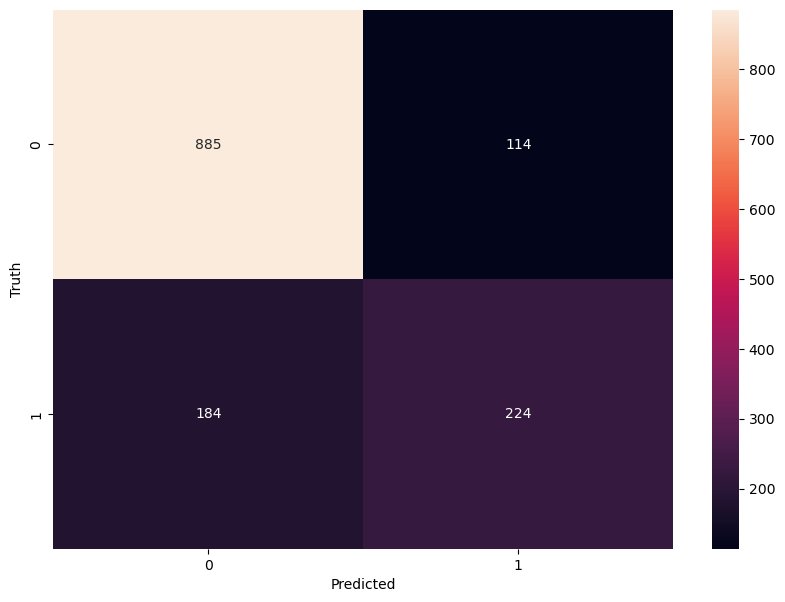

In [40]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels =y_test, predictions = y_predicted)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot =True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")